# Unsupervised Learning: K-Means Clustering

Rafiq Islam  
2024-09-28

## Introduction

Clustering is a fundamental technique in unsupervised learning where the
goal is to group similar data points into clusters. One of the most
popular algorithms for clustering is **K-Means**. K-Means is a
centroid-based algorithm that partitions the dataset into $k$ clusters.
The algorithm iterates over data points, assigning each to one of $k$
centroids (cluster centers), and then updates the centroids based on the
current assignments. The objective is to minimize the sum of squared
distances (also known as inertia) between each data point and its
assigned centroid.

## Mathematics Behind K-Means

The K-Means algorithm works through the following key steps:

1.  **Initialization**: Randomly select $k$ points from the dataset as
    initial centroids.

2.  **Assignment Step**: For each data point, assign it to the closest
    centroid based on the Euclidean distance:

    $$
    \text{distance}(x_i, \mu_j) = \sqrt{\sum_{d=1}^{D} (x_i^d - \mu_j^d)^2}
    $$

where:

-   $x_i$ is the i-th data point.
-   $\mu_j$ is the j-th centroid.
-   $D$ is the number of features (dimensions).

1.  **Update Step**: After all data points are assigned, recalculate the
    centroid of each cluster as the mean of all data points assigned to
    it:

    $$
    \mu_j = \frac{1}{n_j} \sum_{i=1}^{n_j} x_i
    $$ where $n_j$ is the number of points in cluster `j`.

2.  **Repeat**: The assignment and update steps are repeated until the
    centroids no longer change or the maximum number of iterations is
    reached.

### Objective Function (Inertia)

The objective of K-Means is to minimize the following cost function,
also called inertia or within-cluster sum of squares:

$$
J = \sum_{j=1}^{k} \sum_{i=1}^{n_j} \|x_i - \mu_j\|^2
$$

This measures how compact the clusters are, i.e., how close the points
within each cluster are to their centroid.

### How to Choose the Best $k$ Value?

One of the critical tasks in K-Means clustering is selecting the optimal
number of clusters ($k$). Several methods can be used:

#### 1. The Elbow Method

The most common way to determine the best $k$ is the **elbow method**.
It involves plotting the inertia (the sum of squared distances from each
point to its assigned cluster centroid) for different values of $k$. The
point where the inertia starts to flatten out (forming an elbow) is
considered a good choice for $k$.

#### 2. Silhouette Score

The **silhouette score** measures how similar each point is to its own
cluster (cohesion) compared to other clusters (separation). It ranges
from -1 to 1:

-   $1$ indicates that the point is well inside its cluster.  
-   $0$ means the point is on the boundary between two clusters.  
-   Negative values indicate the point may have been assigned to the
    wrong cluster.

#### 3. Gap Statistic

The **gap statistic** compares the total within-cluster variation for
different values of $k$ with the expected value under null reference
distribution. The optimal number of clusters is where the gap statistic
is the largest.

------------------------------------------------------------------------

## Python Implementation of K-Means

### Synthetic Data

Let’s implement K-Means clustering using Python with visualizations and
explore how to choose the best value of $k$ using the elbow method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# For plotting purposes
import seaborn as sns
sns.set()

We’ll create a simple dataset with 4 distinct clusters for
visualization.

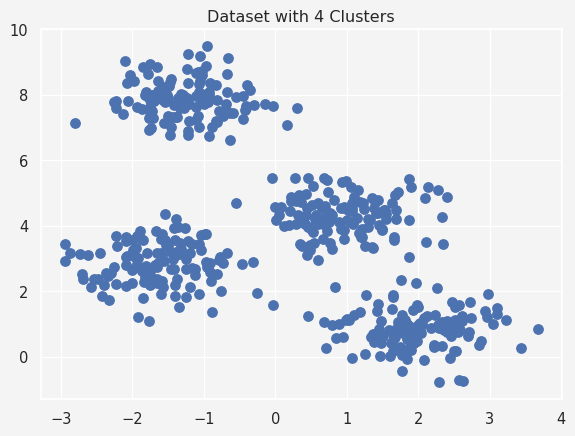

In [2]:
# Create a dataset with 4 clusters
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Dataset with 4 Clusters')
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

We can now apply K-Means clustering with different values of $k$ and
observe how the clusters are formed.

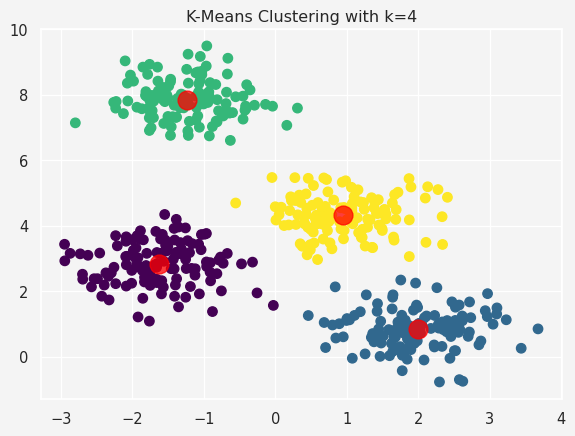

In [3]:
# Fit KMeans with k=4 (since we know we generated 4 clusters)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Predict clusters
y_kmeans = kmeans.predict(X)

# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('K-Means Clustering with k=4')
plt.savefig('kmeans.png')
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

To determine the optimal number of clusters, we’ll plot the inertia for
different values of $k$ using the elbow method.

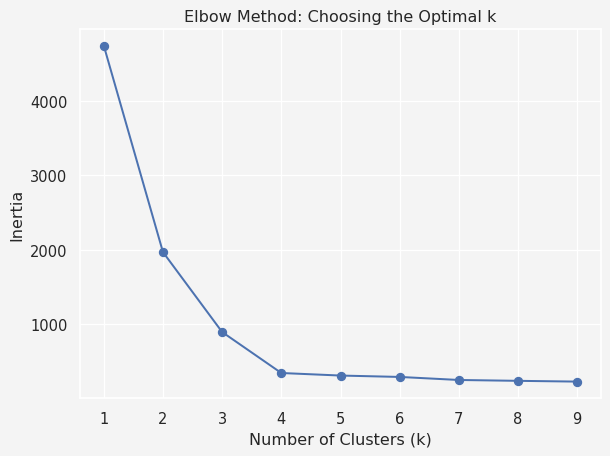

In [4]:
# Test multiple k values
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the inertia vs. k values
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method: Choosing the Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

We see that the curve starts to flatten at $k=4$, suggesting this is a
good choice for the number of clusters. Let’s also compute the
silhouette score for different values of $k$ to confirm our choice.

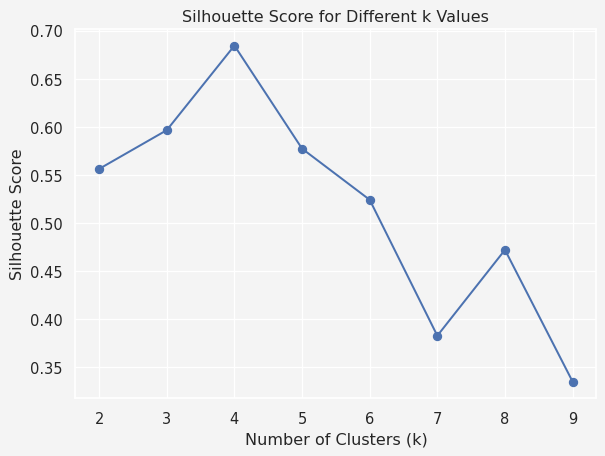

In [5]:
sil_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    sil_scores.append(silhouette_score(X, labels))

# Plot Silhouette Score vs. k
plt.plot(range(2, 10), sil_scores, marker='o')
plt.title('Silhouette Score for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

### Real Data

**Description**:

This dataset contains information about customers of a shopping mall,
including their annual income, spending score, gender, and age.

**Goal:** Our goal is to segment customers into different groups based
on their spending behavior and income.

**Columns**:  
- `CustomerID`: Unique identifier for each customer.  
- `Gender`: The gender of the customer (Male or Female).  
- `Age`: Age of the customer.  
- `Annual Income`: Annual income of the customer in thousands of
dollars.  
- `Spending Score`: A score assigned by the mall based on customer
behavior and spending patterns.

**Data Source:** You can find the Mall Customer Segmentation data on <a
href="https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python"
style="text-decoration:none" target="_blank">Kaggle</a>.

In [6]:
import pandas as pd 
mall = pd.read_csv('Mall_Customers.csv')
mall.head()

In [7]:
# Data Information
print(mall.info())
print('\n')
# Check for Missing Data
print(mall.isnull().sum())
print('\n')
# Data Description
mall.rename(columns={'CustomerID':'ID','Annual Income (k$)':'Income','Spending Score (1-100)':'SpendingScore'},inplace=True)
cmall = mall.drop('ID',axis=1)
print(cmall.describe().loc[['mean','std','min','max']].T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


                mean        std   min    max
Age            38.85  13.969007  18.0   70.0
Income         60.56  26.264721  15.0  137.0
SpendingScore  50.20  25.823522   1.0   99.0

**Pre-Process:** Since our data contains categorical variable `Gender`,
we need to encode this column and scale the numerical features like
`Age`, `Annual Income`, and `Spending Score`.

In [8]:
from sklearn.preprocessing import StandardScaler
X = mall[['Age','Income','SpendingScore']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]

Next we use the `Elbow` method to find the best $k$, the number of
clusters

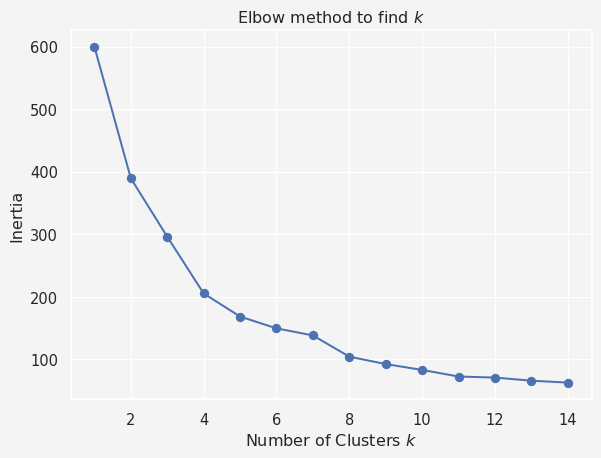

In [9]:
k_values = range(1,15)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(k_values,inertia, marker='o')
plt.title('Elbow method to find $k$')
plt.xlabel('Number of Clusters $k$')
plt.ylabel('Inertia')
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show() 

The elbow point in the plot (where the decrease in inertia starts to
slow) helps determine the optimal number of clusters. Let’s say we find
that $k=5$ looks like a reasonable choice from the plot.

To further validate the choice of $k$, let’s compute the `silhouette`
score for different cluster numbers. A higher `silhouette` score
indicates better-defined clusters

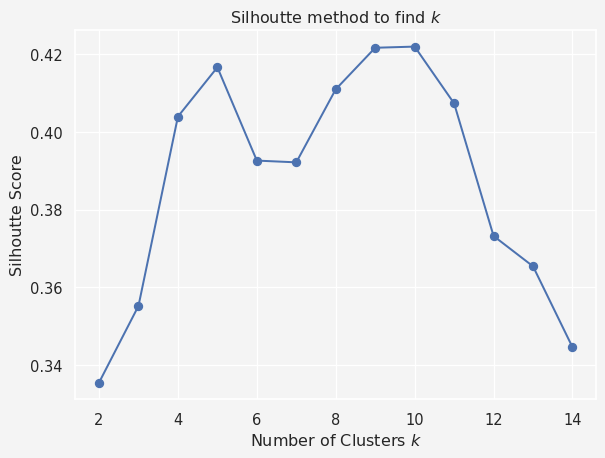

In [10]:
sil_scores = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k, random_state=123)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled,labels))
plt.plot(range(2,15),sil_scores, marker='o')
plt.title('Silhoutte method to find $k$')
plt.xlabel('Number of Clusters $k$')
plt.ylabel('Silhoutte Score')
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show() 

Next, we apply $k=5$ clusters

   ID  Gender  Age  Income  SpendingScore  Cluster
0   1    Male   19      15             39        2
1   2    Male   21      15             81        2
2   3  Female   20      16              6        4
3   4  Female   23      16             77        2
4   5  Female   31      17             40        2

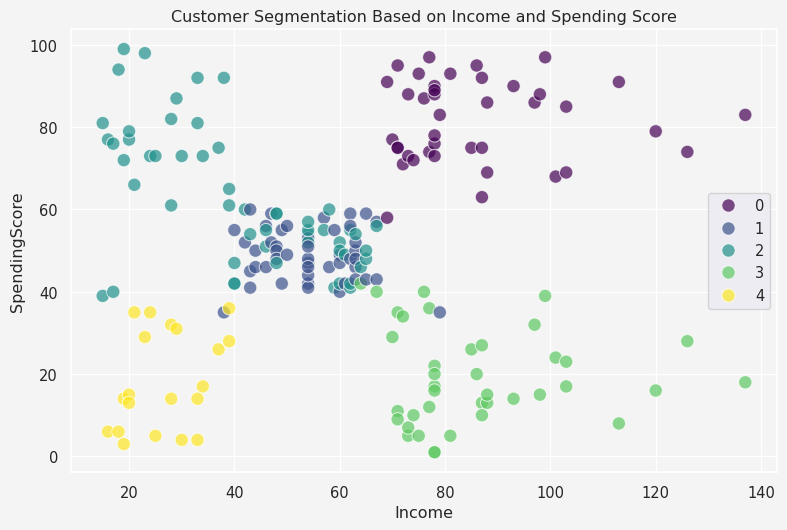

In [11]:
plt.figure(figsize=(9.5,6))
kmeans = KMeans(n_clusters=5, random_state=123)
mall['Cluster'] = kmeans.fit_predict(X_scaled)
print(mall.head())
sns.scatterplot(
    x='Income', y='SpendingScore', hue='Cluster',
    data=mall, palette='viridis', s=100, alpha=0.7
    )
plt.title('Customer Segmentation Based on Income and Spending Score')
plt.legend()
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

Analyze the segments

In [12]:
cluster_summary = mall.drop(columns=['Gender','ID']).groupby('Cluster').mean()
print(cluster_summary)

               Age     Income  SpendingScore
Cluster                                     
0        32.875000  86.100000      81.525000
1        55.638298  54.382979      48.851064
2        25.185185  41.092593      62.240741
3        39.871795  86.102564      19.358974
4        46.250000  26.750000      18.350000

Now say we have two new customers

In [13]:
new_customer = {'ID':[201,202],'Gender':['Male','Female'],'Age': [30,50],'Income':[40,70],'SpendingScore':[70,20]}
new_customer = pd.DataFrame(new_customer)
print(new_customer)

    ID  Gender  Age  Income  SpendingScore
0  201    Male   30      40             70
1  202  Female   50      70             20

We would like to know in which cluster they belong.

In [14]:
X_new = new_customer[['Age', 'Income','SpendingScore']]
X_new_sc = scaler.transform(X_new)
cluster_labels = kmeans.predict(X_new_sc)
print(cluster_labels)

[2 3]

## K-Means is a powerful and widely used clustering algorithm, but it has limitations, such as assuming spherical clusters of equal sizes.

## Limitations of K-Means Clustering

While K-Means is a widely used clustering algorithm due to its
simplicity and scalability, it has several notable limitations:

### 1. **Assumption of Spherical Clusters**

K-Means assumes that clusters are spherical and have roughly the same
size. This assumption may not hold true in real-world datasets, where
clusters may have different shapes and densities. For example, if
clusters are elongated or irregularly shaped, K-Means may not perform
well.

-   **Solution**: Use algorithms like **DBSCAN** (Density-Based Spatial
    Clustering of Applications with Noise) or **Spectral Clustering**,
    which do not assume any specific shape for the clusters.

### 2. **Sensitivity to Initialization**

K-Means is sensitive to the initial selection of centroids. Different
initializations can lead to different final clusters, and in some cases,
the algorithm may converge to suboptimal solutions. To address this, the
algorithm is often run multiple times with different initializations
(e.g., using the `k-means++` initialization method).

-   **Solution**: Use the `k-means++` initialization, which ensures that
    centroids are chosen in a way that increases the likelihood of
    converging to an optimal solution.

### 3. **Needs to Specify `k` in Advance**

One of the main limitations is that K-Means requires the number of
clusters (`k`) to be specified in advance. This can be a challenge when
the number of clusters is unknown, and choosing the wrong `k` can lead
to poor clustering results.

-   **Solution**: Use the **Elbow Method**, **Silhouette Score**, or the
    **Gap Statistic** to estimate the best value for `k`.

### 4. **Outliers and Noise Sensitivity**

K-Means is highly sensitive to outliers, as they can significantly
affect the position of centroids. An outlier will either form its own
cluster or distort the positions of nearby centroids, leading to
incorrect clustering.

-   **Solution**: Preprocess your data by removing outliers or use
    clustering methods like **DBSCAN**, which can handle outliers more
    effectively by considering them as noise.

### 5. **Equal Cluster Size Assumption**

The algorithm tends to assign roughly equal-sized clusters because it
minimizes variance. This can be a problem if clusters in your data have
highly varying sizes. Small clusters might be absorbed into larger ones.

-   **Solution**: Use **Hierarchical Clustering**, which can naturally
    handle different cluster sizes.

### 6. **Non-Convex Shapes**

K-Means struggles with data where clusters have non-convex shapes, such
as two overlapping rings or crescent shapes. It partitions the space
into Voronoi cells, which are convex, leading to poor clustering results
in non-convex structures.

-   **Solution**: Algorithms like **Spectral Clustering** or **Gaussian
    Mixture Models (GMM)** can better handle non-convex clusters.

------------------------------------------------------------------------

## References

1.  **K-Means Algorithm**:
    -   MacQueen, J. B. (1967). “Some Methods for Classification and
        Analysis of Multivariate Observations”. Proceedings of the Fifth
        Berkeley Symposium on Mathematical Statistics and Probability,
        Volume 1: Statistics.
    -   Hartigan, J. A., & Wong, M. A. (1979). “Algorithm AS 136: A
        K-means clustering algorithm”. Journal of the Royal Statistical
        Society. Series C (Applied Statistics), 28(1), 100-108.
2.  **Choosing `k` (Elbow Method & Silhouette Score)**:
    -   Rousseeuw, P. J. (1987). “Silhouettes: A graphical aid to the
        interpretation and validation of cluster analysis”. Journal of
        Computational and Applied Mathematics, 20, 53-65.
3.  **Inertia and the Elbow Method**:
    -   Tibshirani, R., Walther, G., & Hastie, T. (2001). “Estimating
        the number of clusters in a dataset via the gap statistic”.
        Journal of the Royal Statistical Society: Series B (Statistical
        Methodology), 63(2), 411-423.

------------------------------------------------------------------------

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/dsandml/posts/kmeans/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/dsandml/posts/kmeans/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/dsandml/posts/kmeans/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

**You may also like**